In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
# use the cleaned data
df = pd.read_csv("C:\\Users\\beth_\\Documents\\health-insurance\\health-insurance-project-1\\data\\insurance_cleaned.csv")
df.head()


,age,gender,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,healthy weight
4,32,male,28.880,0,no,northwest,3866.85520,overweight


### Hypothesis 1: Smoking increases insurance charges
Plot charges by different attributes with smoking as the hue to easily visualise the effect that smoking has on insurance charges

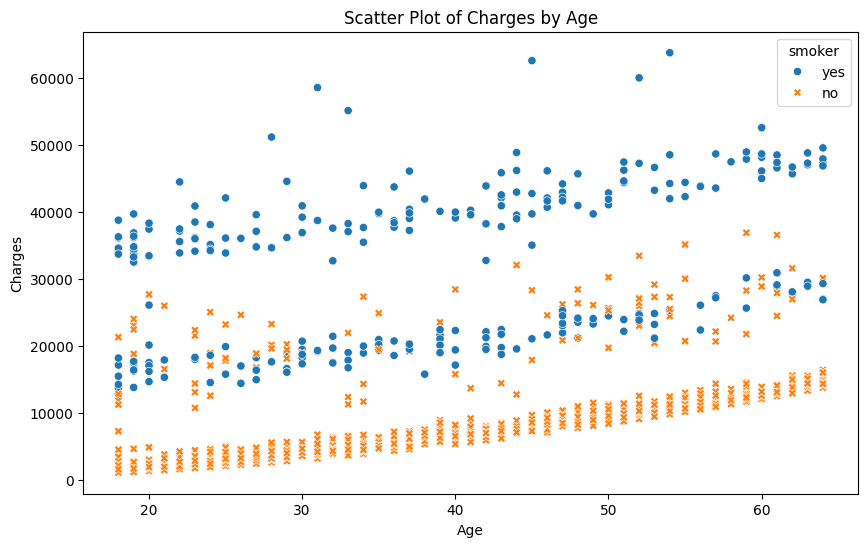

In [3]:
# scatter plot of charges by age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', style='smoker')
plt.title('Scatter Plot of Charges by Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

From the scatterplot above there is a definite trend that smokers (blue circles) have higher health insurance charges when compared by the attribute of age

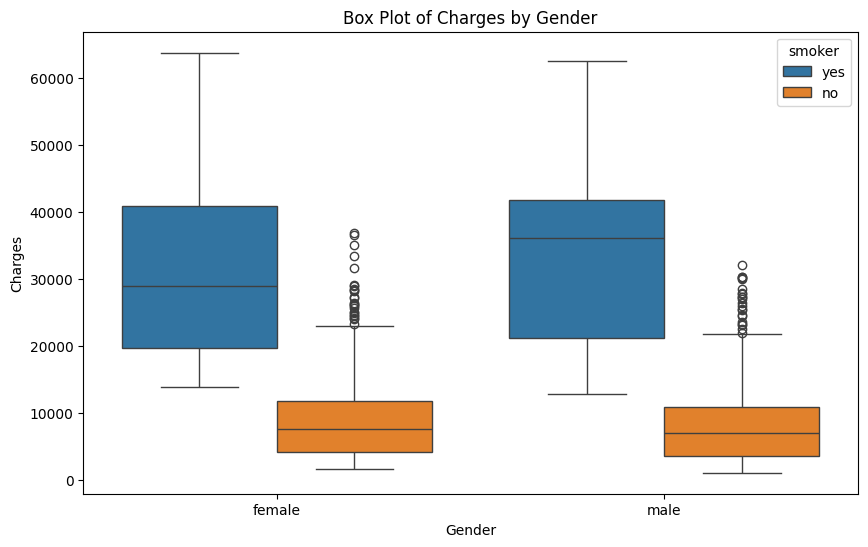

In [4]:
# box plot of charges by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='charges', data=df, hue='smoker')
plt.title('Box Plot of Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

From the boxplot above, again, there is a definite trend that smokers (blue boxes) have higher health insurance charges when compared by the attribute of gender

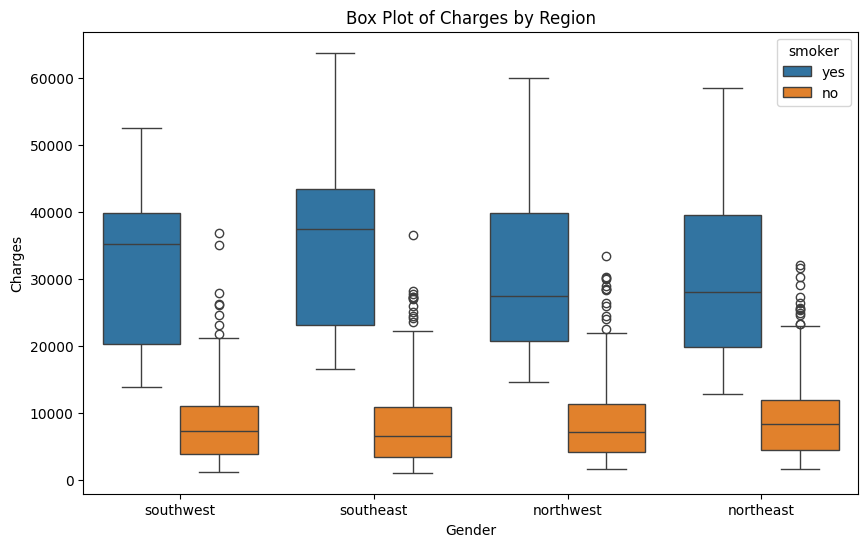

In [5]:
# box plot of charges by region
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df, hue='smoker')
plt.title('Box Plot of Charges by Region')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

The boxplot above shows the third attribute to compare with charges: region. Again, smokers (blue boxes) have much higher interquartile ranges than non-smokers. 

*For the following code: please see screenshot for the plotly figure Screenshot-plotly-hypo-1"*

In [37]:
# bar chart of average charges by age group
df['age_group'] = pd.cut(
                         df['age'], 
                        bins=[18, 30, 40, 50, 60, 70], 
                        labels=['18–30','30–40','40–50','50–60','60–70']
                        )
df_processed = df[['age_group','charges','smoker']].groupby(['age_group','smoker'], observed=False).mean().reset_index()

fig = px.bar(data_frame=df_processed, x="age_group", y='charges', color='smoker', barmode='group')
title='Average Insurance Charges by Age'
fig.update_layout(title=title, xaxis_title='Age', yaxis_title='Average Charges')
fig.show()

To conclude hypothesis 1: a final bar chart to show the average insurance charges by age. It is clear from all four figures that smokers have higher health insurance charges than non-smokers.

### Hypothesis 2: increased BMI increases insurance charges
Plot BMI vs charges

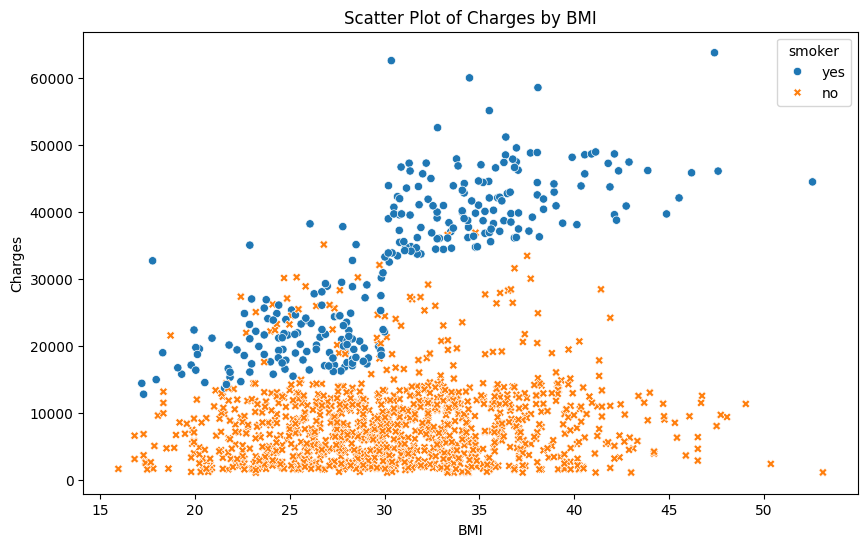

In [36]:
# scatter plot of charges by bmi
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', style='smoker')
plt.title('Scatter Plot of Charges by BMI') 
plt.xlabel('BMI') 
plt.ylabel('Charges')
plt.show()

This initial scatter plot shows a correlation between increasing health insurance charges, increasing BMI and being a smoker. 

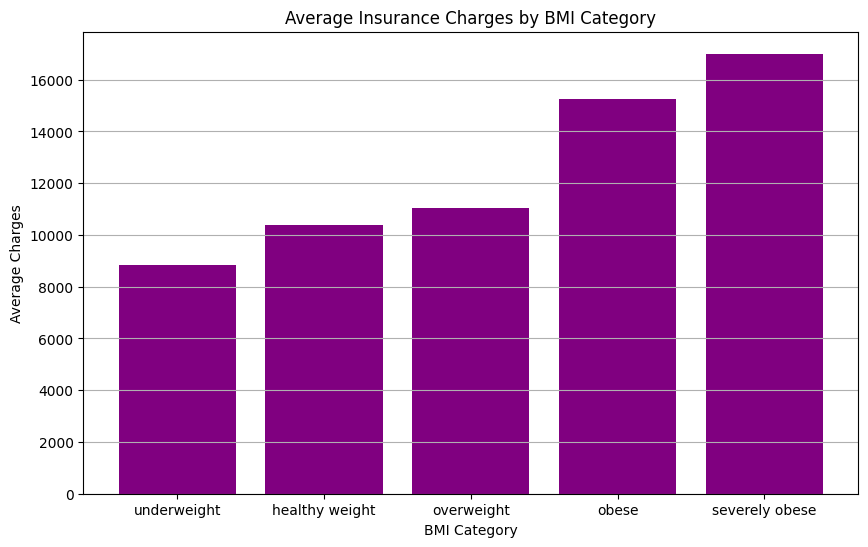

In [ ]:
# bar chart of average charges by BMI category
# order the bmi categories to be logical
order = ['underweight', 'healthy weight', 'overweight', 'obese', 'severely obese']
bmi_avg_charges = df.groupby('bmi_category')['charges'].mean().reset_index()
bmi_avg_charges['bmi_category'] = pd.Categorical(bmi_avg_charges['bmi_category'], categories=order, ordered=True)
bmi_avg_charges = bmi_avg_charges.sort_values('bmi_category')

plt.figure(figsize=(10,6))
plt.bar(x=bmi_avg_charges['bmi_category'], height=bmi_avg_charges['charges'], color='purple')

plt.title('Average Insurance Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Charges')
plt.grid(axis='y')
plt.show()



To conclude hypothesis 2: The above bar plot clearly shows that the average health insurance charges increase with increasing BMI. It is easier to see the BMI Categories than plot the BMI values themselves. 

### Hypothesis 3: Investigate if region affects insurance charges


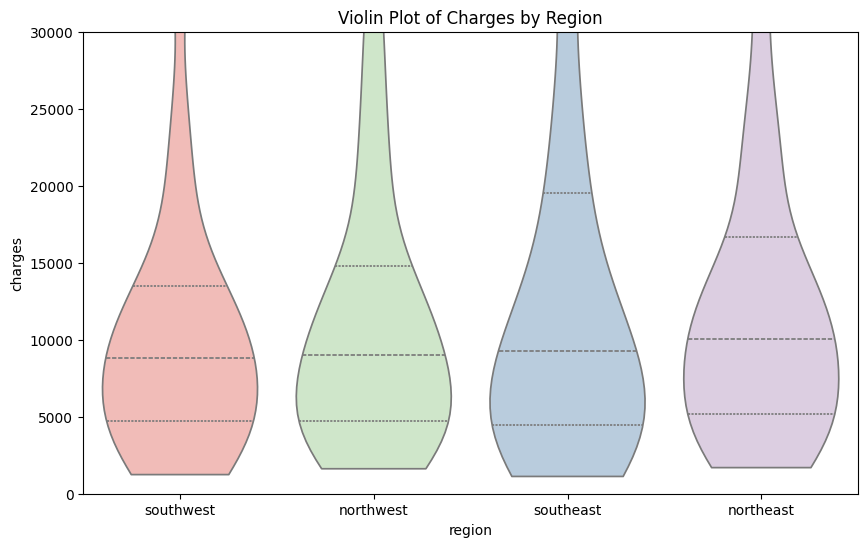

In [46]:
# violin plot of charges by region
plt.figure(figsize=(10, 6))
order = df.groupby("region")["charges"].median().sort_values().index

sns.violinplot(data=df, x="region", y="charges", order = order, inner="quartile", cut=0, hue="region",palette="Pastel1")
plt.title("Violin Plot of Charges by Region")
plt.ylim(0, 30000)
plt.show()


The above violin plot shows the insurance charges by the four regions. The y scale is limited and the median order increasing to more clearly compare the distributions.
This one plot alone is inconclusive. 

In [ ]:
"""
I was spending too much time trying to get the sunburst to work so I created a histogram instead

# sunburst of number of people by region and smoker status
fig = px.sunburst(df, path=['region', 'bmi_category'], values='charges',
                  color='smoker', color_continuous_scale='viridis',
                  title='Sunburst of Charges by Region and BMI Category')
fig.show()
"""

"\nI couldn't get the sunburst to show what I wanted so I created a histogram instead\n\n# sunburst of number of people by region and smoker status\nfig = px.sunburst(df, path=['region', 'bmi_category'], values='charges',\n                  color='smoker', color_continuous_scale='viridis',\n                  title='Sunburst of Charges by Region and BMI Category')\nfig.show()\n"

*For the following code: please see screenshot for the plotly figure Screenshot-plotly-hypo-3"*

In [62]:
# histogram of charges by region and smoker status
fig = px.histogram(df, x="charges", color="region", facet_col='region', facet_row='smoker')
title='Histogram of Charges by Region and Smoker Status'
fig.update_layout(title=title)
fig.show()

To conclude hypothesis 3: there is no obvious or clear correlation between region and health insurance charges without further investigation, perhaps in a future project. The above histogram shows that all four regions have similar profiles. It is again apparent that smokers have higher insurance charges. 

### Extra hypothesis 4: does the number of children affect the insurance charge

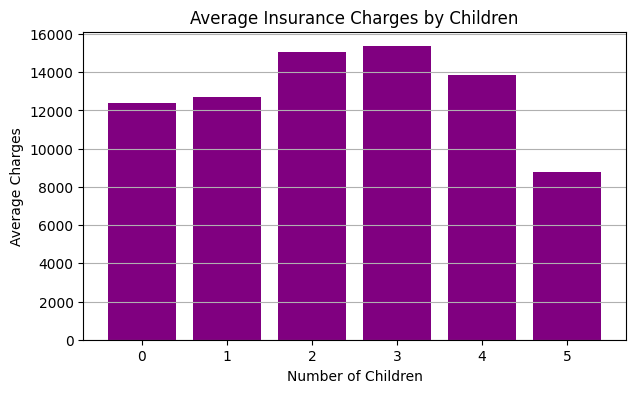

In [69]:
# bar chart of average charges by number of children
order = df['children'].value_counts().index
children_avg_charges = df.groupby('children')['charges'].mean().reset_index()
children_avg_charges['children'] = pd.Categorical(children_avg_charges['children'], categories=order, ordered=True)

plt.figure(figsize=(7,4))
plt.bar(x=children_avg_charges['children'], height=children_avg_charges['charges'], color='purple')

plt.title('Average Insurance Charges by Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.grid(axis='y')
plt.show()

The above bar plot shows that insurance charges do not continue to increase as the number of children increases, charges peak at 3 children and then appear to decrease as the number of children increases. 

**Overall conclusion:**
-   *Health insurance charges are higher for smokers compared to non-smokers*
-   *Health insurance charges increase with increasing BMI*
-   *Within this project a clear relationship between region and insurance charges has not been found, further investigation is required*

In [70]:
# future saving options
# fig.write_html("average_charges_by_age.html")
# fig.write_image("average_charges_by_age.png")
# fig.write_image("average_charges_by_age.pdf")